## Useful examples -- *impute_color.py* functions

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import sys
sys.path.insert(0, '../src/')
sys.path.insert(0, 'scalygraphic/src/')

from im_scale_products import *
from impute_color import *

# Compute
****
### Algebraic Vector Matrix Data: *EscapeTime, Z_initial, Z_final* (ET, Z0, Z)

In [2]:
results_dir = '../../results'
run_parameters = get_default_run_parameters(results_dir=None)

if os.path.isdir(run_parameters['dir_path']) == False:
    os.makedirs(run_parameters['dir_path'])
    
fcn_name = 'nlC3'
eq = EQUS_DICT[EQUS_DICT_NAMED_IDX[fcn_name]][1]
# generate parameters:
# p = eq(1, None)

p = [0.106699281931, -1.446300888486, 0.763588120232]
print('Using Equation parameters:\n',p,'\n')

list_tuple = [(eq, (p))]

t0 = time.time()
ET_1, Z_1, Z0_1 = eq_iter.get_primitives(list_tuple, run_parameters)
tt = time.time() - t0
print(tt, 's\ndata matrices size = ', ET_1.shape)

Using Equation parameters:
 [0.106699281931, -1.446300888486, 0.763588120232] 

1.0849809646606445 s
data matrices size =  (256, 256)


## View the raw escape time & distance data in greyscle:
* Note that most of the data is not easy to see because the extremes hog the black or white.
* Enumerated, normalized version below shows all three imputed with an HSV scheme.

[StackOverflow combine images horizontally](https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python) <br>
[concat PIL images](https://note.nkmk.me/en/python-pillow-concat-images/) <br>
```python
import sys
from PIL import Image

list_im = ['Test1.jpg','Test2.jpg','Test3.jpg']
new_im = Image.new('RGB', (444,95)) #creates a new empty image, RGB mode, and size 444 by 95

for elem in list_im:
    for i in xrange(0,444,95):
        im=Image.open(elem)
        new_im.paste(im, (i,0))
new_im.save('test.jpg')
```

In [27]:
# from PIL import Image

def cat_im_list_hori(im_list):
    """ combine a list of images into one horizontal image 
    """
    w = 0
    h = 0
    for im in im_list:
        w += im.size[0]
        h = max(h, im.size[1])
    w = w - 1
    h = h - 1
    
    print(w, h, '\n')
    new_im = Image.new('L', (w, h))
    
    start_p = 0
    for im in im_list:
        end_p = start_p + im.size[0] - 1
        print(start_p, end_p, '\n')
        new_im.paste(im, (start_p, 0))
        start_p = end_p + 1
        
    return new_im

def cat_im_list_verti(im_list):
    """ combine a list of images into one vertical image 
    """
    w = 0
    h = 0
    for im in im_list:
        h += im.size[0]
        w = max(w, im.size[1])
    w = w - 1
    h = h - 1
    
    print(w, h, '\n')
    new_im = Image.new('L', (w, h))
    
    start_p = 0
    for im in im_list:
        end_p = start_p + im.size[0] - 1
        print(start_p, end_p, '\n')
        new_im.paste(im, (0, start_p))
        start_p = end_p + 1
        
    return new_im

im_list = [g_im_et,g_im_Zd,g_im_Zr]
# new_im = cat_im_list_hori(im_list)
new_im = cat_im_list_verti(im_list)

255 767 

0 255 

256 511 

512 767 



             ET                            Zd                            Zr


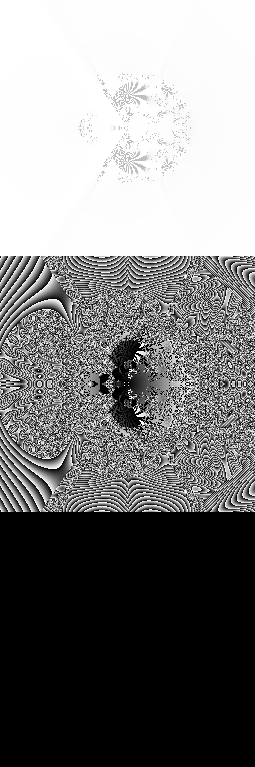

In [28]:
print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

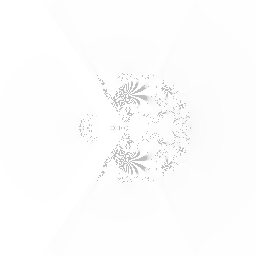

In [10]:
g_im_et = primitive_2_gray(ET_1)
display(g_im_et)

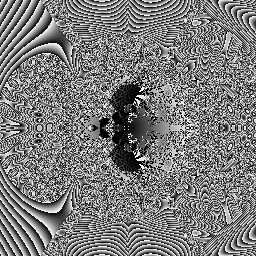

In [11]:
g_im_Zd = primitive_2_gray(np.abs(Z_1 - Z0_1))
display(g_im_Zd)

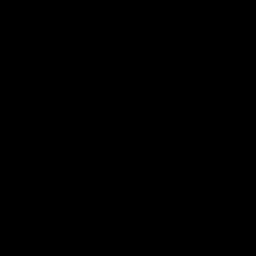

In [12]:
# Zd_1, Zr_1, ETn_1 = etg_norm(Z0_1, Z_1, ET_1)
Zv = np.abs(Z_1 - Z0_1)
Zv = np.arctan2(np.imag(Zv), np.real(Zv))
g_im_Zr = primitive_2_gray(Zv)
# g_im = tip.Image.fromarray(Zv, 'L', colors=2**16-1)

display(g_im_Zr)

### View all results as an HSV (converted to RGB for display)
```python
# normalized enumeration of Z-Z0 distance, rotation (Zd, Zr) and Escape Time
Zd, Zr, ETn = etg_norm(Z0, Z, ET)

A = np.zeros((n_rows, n_cols,3))
A[:,:,0] += ETn     # Hue
A[:,:,1] += Zr      # Saturation
A[:,:,2] += Zd      # Value
```

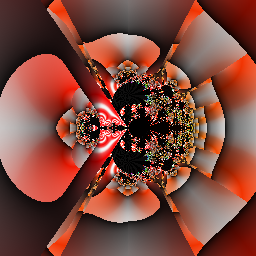

In [5]:
im = get_im(ET_1, Z_1, Z0_1)
display(im)

## Re-Compute
* *theta* rotates the domain before calculation
* Rotate to view symmetry with the broad part at the bottom - humans like that

In [6]:
#                          Rotate the image for human readability:

run_parameters = get_default_run_parameters(results_dir=None)
run_parameters['theta'] = np.pi / 2

t0 = time.time()
ET, Z, Z0 = eq_iter.get_primitives(list_tuple, run_parameters)
tt = time.time() - t0

print(tt, 's\ndata matrices size = ', ET.shape)

1.1793437004089355 s
data matrices size =  (256, 256)


## View The Rotated Data with different color assignments

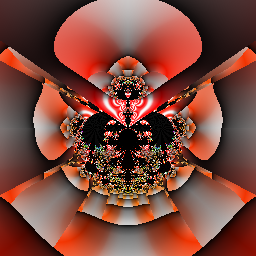

In [7]:
#                     HSV to RGB composite
im = get_im(ET, Z, Z0)
display(im)

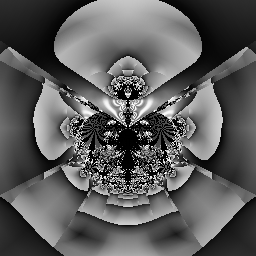

In [8]:
#                     HSV to RGB composite to Greyscale
im = get_gray_im(ET, Z, Z0)
display(im)

## Color map assignment to where greyscale is used as index to map
(choose color map from the list)

In [9]:
show_color_maps(6)

            Accent             Blues              BrBG              BuGn              BuPu            CMRmap
              GnBu            Greens             Greys              OrRd           Oranges              PRGn
           Pastel1           Pastel2              PiYG              PuBu            PuBuGn              PuOr
           Purples              RdBu              RdGy              RdPu            RdYlBu            RdYlGn
              Set1              Set2              Set3          Spectral            Wistia              YlGn
            YlOrBr            YlOrRd            afmhot            autumn            binary              bone
               bwr           cividis              cool          coolwarm            copper         cubehelix
        gist_earth         gist_gray         gist_heat         gist_ncar      gist_rainbow        gist_stern
           gnuplot          gnuplot2              gray               hot               hsv           inferno
             magma 

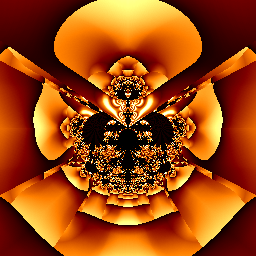

In [10]:
#                     HSV to RGB composite to Greyscale as index to colormap
do_im = map_etg_composite(Z0, Z, ET, c_map_name='afmhot')
display(do_im)

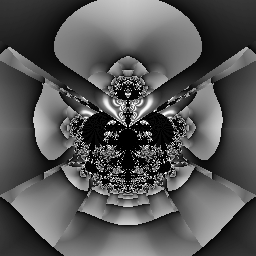

In [11]:
do_im = map_etg_composite(Z0, Z, ET, c_map_name='gray')
display(do_im)

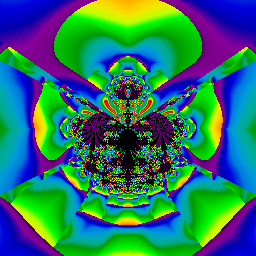

In [12]:
do_im = map_etg_composite(Z0, Z, ET, c_map_name='nipy_spectral')
display(do_im)

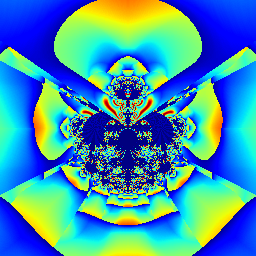

In [13]:
do_im = map_etg_composite(Z0, Z, ET, c_map_name='jet')
display(do_im)